# Визуализация данных при помощи t-SNE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.manifold import TSNE

RANDOM_STATE = 42

Загрузим данные

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

pixel_data = digits.data
target = digits.target

pixel_data.shape

(1797, 64)

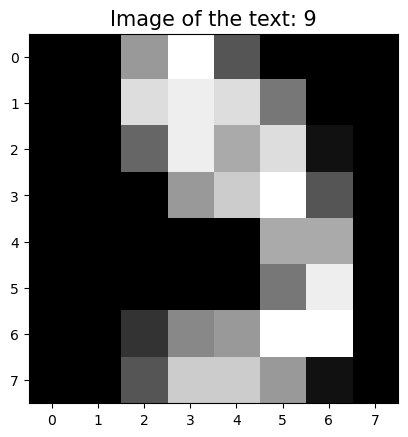

In [3]:
single_image = pixel_data[105, :].reshape(8,8)

plt.imshow(single_image, cmap='gray')
plt.title(f"Image of the text: {target[105]}", fontsize=15)
plt.show()

Будем делать визуализацию на плоскости (n_components = 2)

In [4]:
tsne = TSNE(n_components=2, random_state=RANDOM_STATE)

x_transformed = tsne.fit_transform(pixel_data)

In [5]:
tsne_df = pd.DataFrame(np.column_stack((x_transformed, target)), columns=['X', 'Y', "Targets"])

tsne_df.loc[:, "Targets"] = tsne_df.Targets.astype(int)

C:\Users\админ\AppData\Local\Temp\ipykernel_14256\1656488313.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tsne_df.loc[:, "Targets"] = tsne_df.Targets.astype(int)


In [6]:
tsne_df.head(10)

,X,Y,Targets
0,-2.858674,53.402401,0
1,10.281713,-11.669281,1
2,-13.629440,-18.610838,2
3,-35.551495,6.453555,3
4,40.749649,-7.399710,4
5,-27.135273,15.134717,5
6,33.437119,14.709579,6
7,2.191355,-42.350632,7
8,-14.470968,-5.775028,8
9,-20.102564,15.211811,9


Нарисуем результат

<Figure size 1000x800 with 0 Axes>

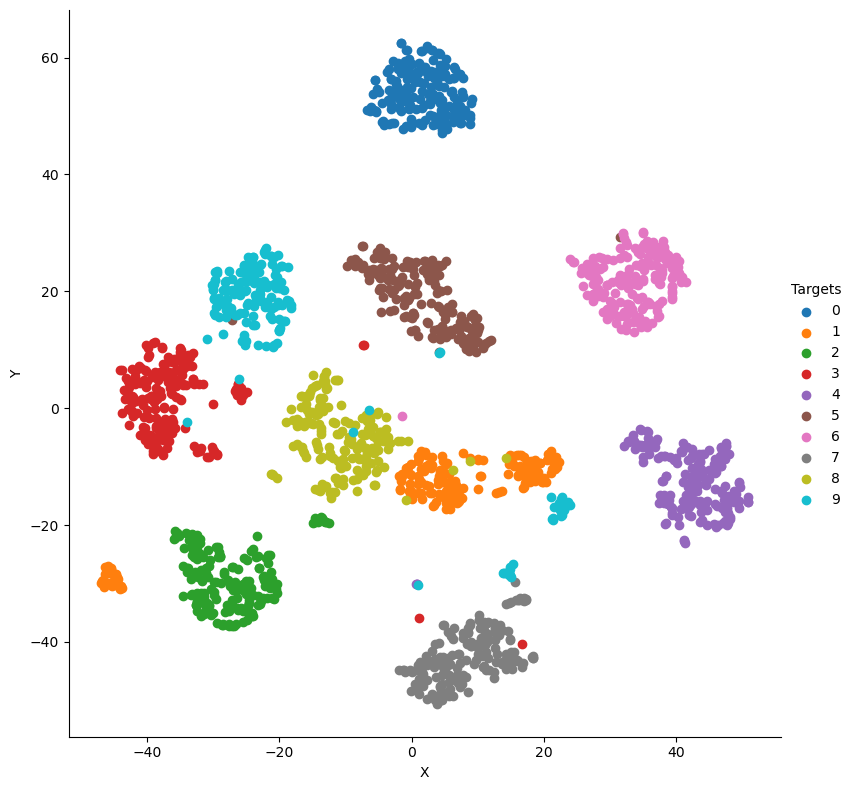

In [7]:
plt.figure(figsize=(10,8))

g = sns.FacetGrid(data=tsne_df, hue='Targets', height=8)

g.map(plt.scatter, 'X', 'Y').add_legend()

plt.show()